# From Aisles to Insights: Decoding Association Rules and Seasonal Cues in Grocery Shopping

In [ ]:
!pip install opendatasets
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=3f42620382115bc3cacf2b9184c19af7aac55e9fed100e6f8539c37edbc5079b
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import math
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import opendatasets as od
from apyori import apriori

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: erikvarga98
Your Kaggle Key: ··········


100%|██████████| 455k/455k [00:00<00:00, 52.4MB/s]

## (a) Association rule mining

### Import dataset

In [ ]:
basket = read_csv("/content/groceries-dataset-for-market-basket-analysismba/basket.csv")
basket

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14958,butter milk,whipped/sour cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14959,bottled water,herbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14960,fruit/vegetable juice,onions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14961,bottled beer,other vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing

In [ ]:
# Convert the dataframe into a list of lists
transactions = []

for _, row in basket.iterrows():
  transaction = []

  for i in row:
    if i == i:
      transaction.append(i)

  transactions.append(transaction)

print(transactions)

[['whole milk', 'pastry', 'salty snack'], ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'], ['soda', 'pickled vegetables'], ['canned beer', 'misc. beverages'], ['sausage', 'hygiene articles'], ['sausage', 'whole milk', 'rolls/buns'], ['whole milk', 'soda'], ['frankfurter', 'soda', 'whipped/sour cream'], ['frankfurter', 'curd'], ['beef', 'white bread'], ['butter', 'whole milk'], ['frozen vegetables', 'other vegetables'], ['tropical fruit', 'sugar'], ['butter milk', 'specialty chocolate'], ['frozen meals', 'dental care'], ['rolls/buns', 'rolls/buns'], ['root vegetables', 'detergent'], ['sausage', 'rolls/buns'], ['dish cleaner', 'cling film/bags'], ['canned beer', 'frozen fish'], ['pip fruit', 'whole milk', 'tropical fruit'], ['root vegetables', 'whole milk', 'pastry'], ['rolls/buns', 'red/blush wine', 'chocolate'], ['other vegetables', 'shopping bags'], ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'], ['other vegetables', 'hygiene articles'], ['whipped/so

### Implement Apriori algorithm

In [ ]:
def print_association_rules(itemsets_with_rules):
  "Format the association rules to achieve a more appealing output."
  for itemset_with_rules in itemsets_with_rules:
      itemset = itemset_with_rules[0]
      associated_rules = itemset_with_rules[2]

      print(f"{list(itemset)} -> [")

      for associated_rule in associated_rules:
        associated_rule_list = list(associated_rule)

        associated_rules_object = {
            'items_base': list(associated_rule_list[0]),
            'items_add': list(associated_rule_list[1]),
            'confidence': associated_rule_list[2],
            'lift': associated_rule_list[3]
        }

        print("   " + str(associated_rules_object))

      print(']\n')

In [ ]:
itemsets_with_rules = list(apriori(transactions, min_support=0.001, min_confidence=0, min_lift=0))

print_association_rules(itemsets_with_rules)

['Instant food products'] -> [
   {'items_base': [], 'items_add': ['Instant food products'], 'confidence': 0.004009891064626078, 'lift': 1.0}
]

['UHT-milk'] -> [
   {'items_base': [], 'items_add': ['UHT-milk'], 'confidence': 0.021386085678005748, 'lift': 1.0}
]

['abrasive cleaner'] -> [
   {'items_base': [], 'items_add': ['abrasive cleaner'], 'confidence': 0.0014702933903628951, 'lift': 1.0}
]

['artif. sweetener'] -> [
   {'items_base': [], 'items_add': ['artif. sweetener'], 'confidence': 0.0019381140145692708, 'lift': 1.0}
]

['baking powder'] -> [
   {'items_base': [], 'items_add': ['baking powder'], 'confidence': 0.008086613646995923, 'lift': 1.0}
]

['bathroom cleaner'] -> [
   {'items_base': [], 'items_add': ['bathroom cleaner'], 'confidence': 0.0011361358016440553, 'lift': 1.0}
]

['beef'] -> [
   {'items_base': [], 'items_add': ['beef'], 'confidence': 0.03395041101383412, 'lift': 1.0}
]

['berries'] -> [
   {'items_base': [], 'items_add': ['berries'], 'confidence': 0.02178707

In [ ]:
itemsets_with_rules_higher_mins = list(apriori(transactions, min_support=0.001, min_confidence=0.14, min_lift=1.1))

print_association_rules(itemsets_with_rules_higher_mins)

['packaged fruit/vegetables', 'rolls/buns'] -> [
   {'items_base': ['packaged fruit/vegetables'], 'items_add': ['rolls/buns'], 'confidence': 0.14173228346456695, 'lift': 1.2884205087972755}
]

['processed cheese', 'rolls/buns'] -> [
   {'items_base': ['processed cheese'], 'items_add': ['rolls/buns'], 'confidence': 0.14473684210526316, 'lift': 1.315733516659206}
]

['seasonal products', 'rolls/buns'] -> [
   {'items_base': ['seasonal products'], 'items_add': ['rolls/buns'], 'confidence': 0.14150943396226415, 'lift': 1.2863946903872165}
]

['whole milk', 'semi-finished bread'] -> [
   {'items_base': ['semi-finished bread'], 'items_add': ['whole milk'], 'confidence': 0.176056338028169, 'lift': 1.1148247930239072}
]

['soda', 'rolls/buns', 'other vegetables'] -> [
   {'items_base': ['soda', 'rolls/buns'], 'items_add': ['other vegetables'], 'confidence': 0.14049586776859505, 'lift': 1.150651160055549}
]

['whole milk', 'sausage', 'rolls/buns'] -> [
   {'items_base': ['sausage', 'rolls/buns'

## (b) Analysis of the season influence on the shopping pattern

### Import dataset

In [ ]:
groceries = read_csv("/content/groceries-dataset-for-market-basket-analysismba/Groceries data.csv")
groceries

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


### Preprocessing

In [ ]:
# Define the season labels
season_labels = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Convert 'month' column to categorical type for easy mapping
groceries['month'] = pd.Categorical(groceries['month'])
groceries['season'] = groceries['month'].map(season_labels)

# Define the order of the seasons
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

In [ ]:
groceries

,Member_number,Date,itemDescription,year,month,day,day_of_week,season
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Summer
1,2552,2015-05-01,whole milk,2015,5,1,4,Spring
2,2300,2015-09-19,pip fruit,2015,9,19,5,Fall
3,1187,2015-12-12,other vegetables,2015,12,12,5,Winter
4,3037,2015-01-02,whole milk,2015,1,2,4,Winter
...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6,Summer
38761,2022,2014-02-23,candy,2014,2,23,6,Winter
38762,1097,2014-04-16,cake bar,2014,4,16,2,Spring
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2,Spring


### Total number of items sold in each season

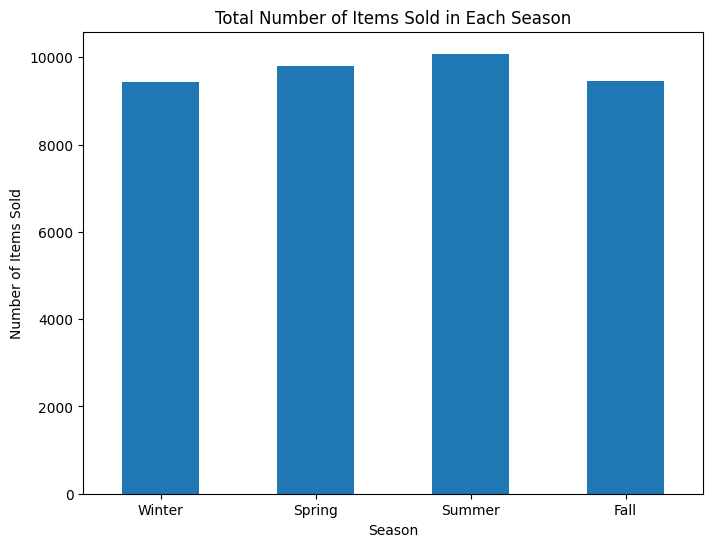

In [ ]:
# Get the total number of items sold in each season
season_total_items_sold = groceries.groupby('season')['itemDescription'].count()

season_total_items_sold = season_total_items_sold.reindex(season_order)

plt.figure(figsize=(8, 6))
season_total_items_sold.plot(kind='bar')
plt.title('Total Number of Items Sold in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=0)
plt.show()

### Distribution of shopping patterns across different days of the week within each season

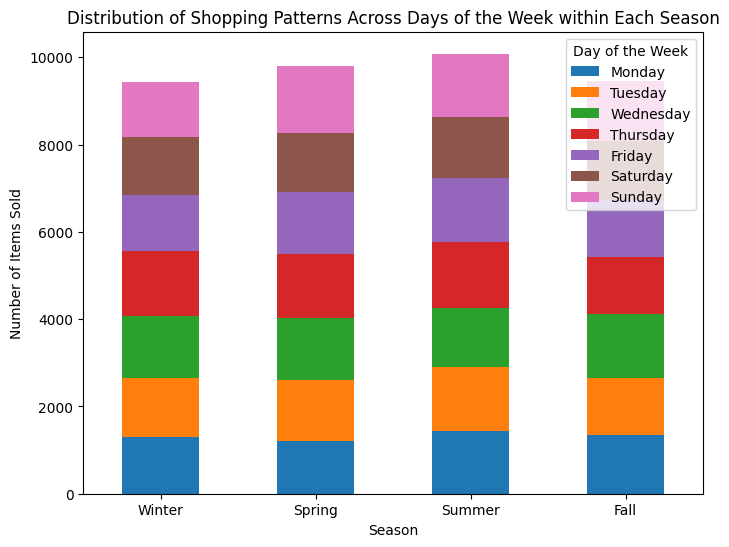

In [ ]:
# Group the data by season, day_of_week, and calculate the sum of item counts
season_day_items = groceries.groupby(['season', 'day_of_week'])['itemDescription'].count().reset_index()

# Pivot the data to create a matrix of seasons as rows and days of the week as columns
pivot_season_day = season_day_items.pivot(index='season', columns='day_of_week', values='itemDescription')

# Rename the column names with the full day names
pivot_season_day.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_season_day = pivot_season_day.reindex(season_order)

pivot_season_day.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Distribution of Shopping Patterns Across Days of the Week within Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Items Sold')
plt.legend(title='Day of the Week')
plt.xticks(rotation=0)
plt.show()

### Total number of transactions made in each season

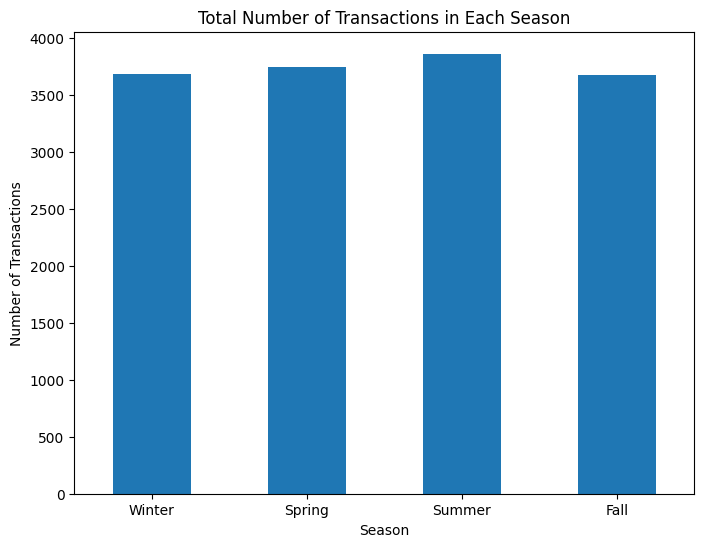

In [ ]:
# Get the total number of transactions made in each season
season_total_transactions = groceries.groupby(['season', 'Member_number', 'Date']).size().reset_index().groupby('season')['Date'].count()

season_total_transactions = season_total_transactions.reindex(season_order)

season_total_transactions.plot(kind='bar', figsize=(8, 6))
plt.title('Total Number of Transactions in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

### Average number of items purchased per transaction in each season

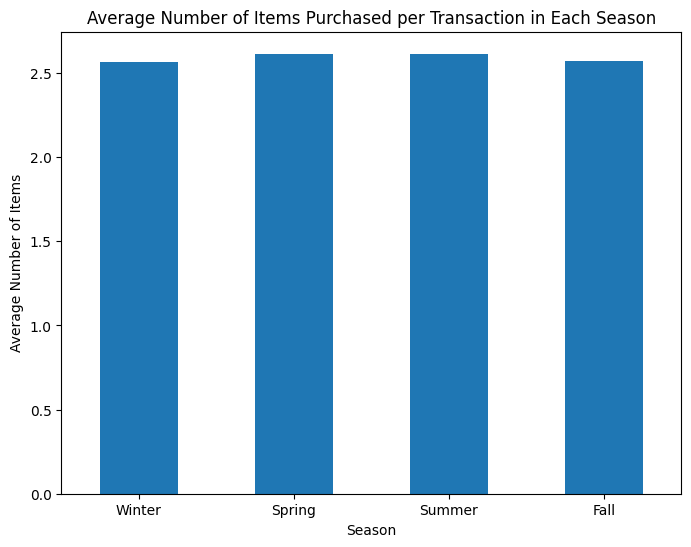

In [ ]:
# Get the average number of items purchased per transaction in each season
season_avg_items_per_transaction = season_total_items_sold / season_total_transactions

season_avg_items_per_transaction = season_avg_items_per_transaction.reindex(season_order)

season_avg_items_per_transaction.plot(kind='bar', figsize=(8, 6))
plt.title('Average Number of Items Purchased per Transaction in Each Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Items')
plt.xticks(rotation=0)
plt.show()

### Most frequent item purchased in each season

In [ ]:
# Calculate the most frequent item(s) purchased in each season and their frequencies
seasons_most_frequent_items = groceries.groupby('season')['itemDescription'].apply(lambda x: x.value_counts().nlargest(10)).reset_index()

for season_most_frequent_items in np.array_split(seasons_most_frequent_items, 4):
  print(f"Top most frequently sold items purchased in {season_most_frequent_items['season'].iloc[0].lower()}:")

  # Remove redundant column
  season_most_frequent_items = season_most_frequent_items.drop(columns = 'season', axis = 1).reset_index(drop=True)

  # Start index from 1
  season_most_frequent_items.index += 1

  # Rename the columns for clarity
  season_most_frequent_items.columns = ['most_frequent_item', 'frequency']

  print(season_most_frequent_items)

Top most frequently sold items purchased in fall:
   most_frequent_item  frequency
1          whole milk        629
2    other vegetables        476
3          rolls/buns        445
4                soda        379
5              yogurt        334
6     root vegetables        284
7      tropical fruit        255
8       bottled water        216
9        citrus fruit        198
10            sausage        197
Top most frequently sold items purchased in spring:
   most_frequent_item  frequency
1          whole milk        652
2    other vegetables        445
3          rolls/buns        409
4                soda        375
5              yogurt        367
6      tropical fruit        282
7       bottled water        258
8             sausage        253
9     root vegetables        232
10       citrus fruit        211
Top most frequently sold items purchased in summer:
   most_frequent_item  frequency
1          whole milk        662
2    other vegetables        506
3          rolls/buns

### Clients' items for every season

In [ ]:
groceries[:30]

,Member_number,Date,itemDescription,year,month,day,day_of_week,season
0,1808,2015-07-21,tropical fruit,2015,7,21,1,Summer
1,2552,2015-05-01,whole milk,2015,5,1,4,Spring
2,2300,2015-09-19,pip fruit,2015,9,19,5,Fall
3,1187,2015-12-12,other vegetables,2015,12,12,5,Winter
4,3037,2015-01-02,whole milk,2015,1,2,4,Winter
5,4941,2015-02-14,rolls/buns,2015,2,14,5,Winter
6,4501,2015-08-05,other vegetables,2015,8,5,2,Summer
7,3803,2015-12-23,pot plants,2015,12,23,2,Winter
8,2762,2015-03-20,whole milk,2015,3,20,4,Spring
9,4119,2015-12-02,tropical fruit,2015,12,2,2,Winter


In [ ]:
# Create four dictionaries (one per season) with all the items that the clients have bought
winter_items_per_clients = {}
spring_items_per_clients = {}
summer_items_per_clients = {}
fall_items_per_clients = {}

for index, grocery in groceries.iterrows():
  items_per_clients_object = {}

  match grocery['season']:
    case 'Winter':
         items_per_clients_object = winter_items_per_clients
    case 'Spring':
         items_per_clients_object = spring_items_per_clients
    case 'Summer':
         items_per_clients_object = summer_items_per_clients
    case 'Fall':
         items_per_clients_object = fall_items_per_clients

  client_id = grocery['Member_number']
  item = grocery['itemDescription']

  if client_id in items_per_clients_object:
    items_per_clients_object[client_id].add(item)
  else:
    items_per_clients_object[client_id] = {item}

### Similarity matrix for every season

In [ ]:
def get_jaccard_similarity(first_list, second_list):
  """Get the Jaccard similarity of two lists."""
  intersection = len(list(set(first_list).intersection(second_list)))
  union = (len(first_list) + len(second_list)) - intersection

  return float(intersection) / union

def get_similarity_matrix(list_of_lists, similarity_function):
  """Get the similarity matrix (based on a similarity function) of two lists."""
  nr_of_lists = len(list_of_lists)
  similarity_matrix = [[1 for x in range(nr_of_lists)] for y in range(nr_of_lists)]

  for i in range(nr_of_lists):
    for j in range(nr_of_lists):
      if j < i:
        similarity_matrix[i][j] = similarity_function(list_of_lists[i], list_of_lists[j])

  for i in range(nr_of_lists):
    for j in range(nr_of_lists):
      if j > i:
        similarity_matrix[i][j] = similarity_matrix[j][i]

  return similarity_matrix

winter_similarity_matrix = get_similarity_matrix(list(winter_items_per_clients.values()), get_jaccard_similarity)
spring_similarity_matrix = get_similarity_matrix(list(spring_items_per_clients.values()), get_jaccard_similarity)
summer_similarity_matrix = get_similarity_matrix(list(summer_items_per_clients.values()), get_jaccard_similarity)
fall_similarity_matrix = get_similarity_matrix(list(fall_items_per_clients.values()), get_jaccard_similarity)

### Number of clients in each season

In [ ]:
print("The number of clients in each season:")
print('winter:', len(winter_similarity_matrix))
print('spring:', len(spring_similarity_matrix))
print('summer:', len(summer_similarity_matrix))
print('fall:', len(fall_similarity_matrix))

The number of clients in each season:
winter: 2406
spring: 2454
summer: 2433
fall: 2430


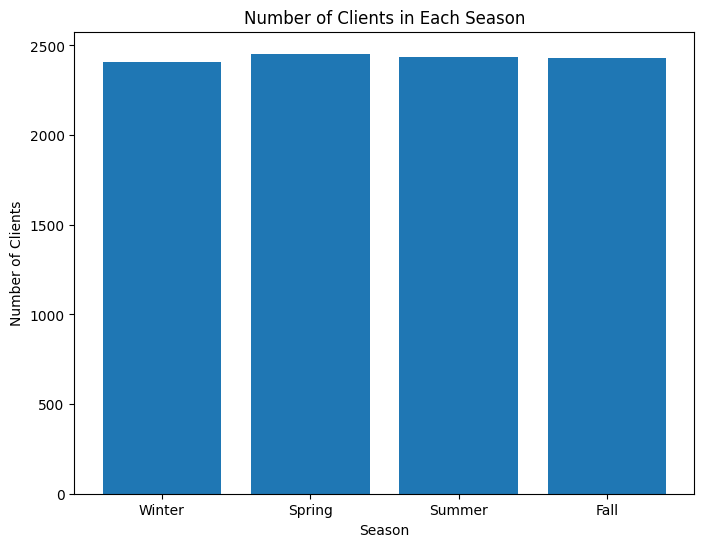

In [ ]:
# Define the number of clients in each season
client_counts = [len(winter_similarity_matrix), len(spring_similarity_matrix), len(summer_similarity_matrix), len(fall_similarity_matrix)]

plt.figure(figsize=(8, 6))
plt.bar(season_order, client_counts)
plt.title('Number of Clients in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Clients')
plt.show()

In [ ]:
def get_most_or_least_similar_client(similarity_matrix, transactions, search_for_most = True):
  """Get the most or least similar client compared to the other clients."""
  most_or_least_similar_client_index = -1

  if search_for_most:
    most_or_least_similar_client_similarity = -math.inf
  else:
    most_or_least_similar_client_similarity = math.inf

  for client_id, client_simiarity_row in enumerate(similarity_matrix):
    total_client_similarity = 0

    for client_simiarity in client_simiarity_row:
      total_client_similarity += client_simiarity

    condition = total_client_similarity > most_or_least_similar_client_similarity

    if not(search_for_most):
      condition = total_client_similarity < most_or_least_similar_client_similarity

    if condition:
      most_or_least_similar_client_index = client_id
      most_or_least_similar_client_similarity = total_client_similarity

  client_id = list(transactions.keys())[most_or_least_similar_client_index]

  return {
      'client_id': client_id,
      'client_similarity': most_or_least_similar_client_similarity / len(similarity_matrix),
      'items': transactions[client_id]
  }

print('Winter:')
print(get_most_or_least_similar_client(winter_similarity_matrix, winter_items_per_clients))
print(get_most_or_least_similar_client(winter_similarity_matrix, winter_items_per_clients, False))
print('Spring:')
print(get_most_or_least_similar_client(spring_similarity_matrix, spring_items_per_clients))
print(get_most_or_least_similar_client(spring_similarity_matrix, spring_items_per_clients, False))
print('Summer:')
print(get_most_or_least_similar_client(summer_similarity_matrix, summer_items_per_clients))
print(get_most_or_least_similar_client(summer_similarity_matrix, summer_items_per_clients, False))
print('Fall:')
print(get_most_or_least_similar_client(fall_similarity_matrix, fall_items_per_clients))
print(get_most_or_least_similar_client(fall_similarity_matrix, fall_items_per_clients, False))

Winter:
{'client_id': 4274, 'client_similarity': 0.09215628958917782, 'items': {'whole milk', 'rolls/buns', 'other vegetables', 'beef', 'bottled beer', 'soda'}}
{'client_id': 1529, 'client_similarity': 0.0010257095356845979, 'items': {'preservation products', 'soups'}}
Spring:
{'client_id': 3818, 'client_similarity': 0.09613066915381499, 'items': {'tropical fruit', 'whole milk', 'curd', 'yogurt', 'other vegetables', 'soda'}}
{'client_id': 3308, 'client_similarity': 0.0014348279629453225, 'items': {'light bulbs', 'tea'}}
Summer:
{'client_id': 1879, 'client_similarity': 0.10455594542596668, 'items': {'rolls/buns', 'yogurt', 'other vegetables', 'whole milk'}}
{'client_id': 2605, 'client_similarity': 0.001069306772142777, 'items': {'potato products', 'ketchup'}}
Fall:
{'client_id': 1188, 'client_similarity': 0.10321447880906748, 'items': {'rolls/buns', 'whole milk', 'other vegetables', 'bottled beer', 'soda'}}
{'client_id': 4838, 'client_similarity': 0.001721209745901104, 'items': {'honey'

## Clustering

-------------------------------------------------- Winter --------------------------------------------------
Winter with 9 distance threshold (2 clusters):
Cluster 0:
Number of clients in the cluster: 2005
Items' counters:
[('whole milk', 435), ('rolls/buns', 310), ('soda', 281), ('yogurt', 230), ('root vegetables', 230), ('tropical fruit', 209), ('bottled water', 195), ('sausage', 176), ('pip fruit', 150), ('citrus fruit', 148), ('pastry', 148), ('shopping bags', 140), ('bottled beer', 133), ('whipped/sour cream', 132), ('newspapers', 124), ('canned beer', 121), ('brown bread', 121), ('fruit/vegetable juice', 116), ('curd', 116), ('beef', 116), ('frankfurter', 114), ('domestic eggs', 112), ('butter', 110), ('pork', 96), ('frozen vegetables', 94), ('coffee', 87), ('margarine', 86), ('chicken', 82), ('cream cheese ', 77), ('dessert', 75), ('white bread', 71), ('waffles', 70), ('hamburger meat', 69), ('chocolate', 66), ('berries', 60), ('onions', 60), ('misc. beverages', 59), ('napkins',

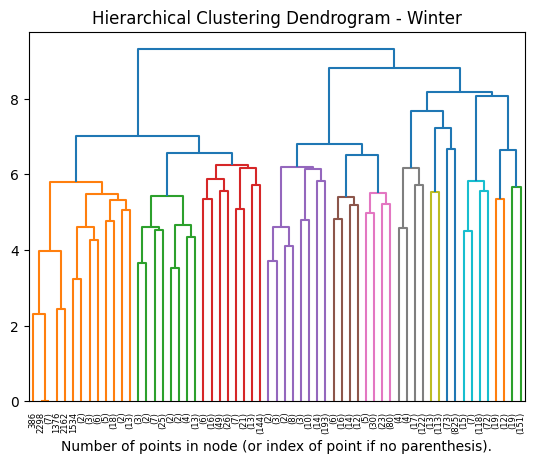

Winter with 8.5 distance threshold (3 clusters):
Cluster 0:
Number of clients in the cluster: 1584
Items' counters:
[('rolls/buns', 253), ('soda', 219), ('root vegetables', 183), ('yogurt', 173), ('bottled water', 147), ('tropical fruit', 145), ('sausage', 130), ('pip fruit', 122), ('citrus fruit', 116), ('pastry', 110), ('shopping bags', 103), ('whipped/sour cream', 100), ('bottled beer', 99), ('brown bread', 98), ('newspapers', 95), ('curd', 92), ('frankfurter', 90), ('canned beer', 90), ('fruit/vegetable juice', 88), ('beef', 85), ('butter', 84), ('domestic eggs', 83), ('pork', 75), ('frozen vegetables', 71), ('margarine', 69), ('coffee', 68), ('dessert', 66), ('chicken', 58), ('cream cheese ', 56), ('chocolate', 52), ('white bread', 51), ('berries', 51), ('hamburger meat', 50), ('misc. beverages', 49), ('waffles', 45), ('napkins', 45), ('butter milk', 45), ('onions', 44), ('UHT-milk', 43), ('sugar', 41), ('oil', 39), ('meat', 39), ('specialty bar', 39), ('beverages', 39), ('long li

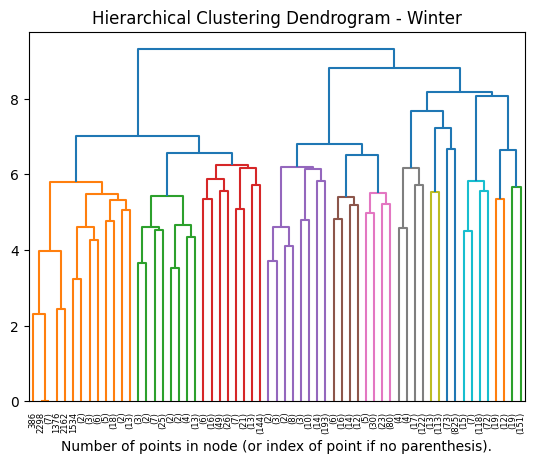

Winter with 8 distance threshold (5 clusters):
Cluster 0:
Number of clients in the cluster: 1171
Items' counters:
[('root vegetables', 161), ('yogurt', 127), ('bottled water', 109), ('tropical fruit', 106), ('pip fruit', 95), ('sausage', 92), ('citrus fruit', 85), ('bottled beer', 80), ('whipped/sour cream', 79), ('pastry', 78), ('shopping bags', 75), ('brown bread', 73), ('frankfurter', 72), ('curd', 71), ('beef', 67), ('canned beer', 64), ('domestic eggs', 62), ('butter', 60), ('newspapers', 60), ('fruit/vegetable juice', 59), ('coffee', 53), ('pork', 53), ('dessert', 52), ('margarine', 52), ('frozen vegetables', 46), ('cream cheese ', 45), ('misc. beverages', 40), ('berries', 39), ('chocolate', 39), ('waffles', 37), ('chicken', 36), ('hamburger meat', 36), ('butter milk', 35), ('white bread', 33), ('napkins', 32), ('sugar', 32), ('onions', 32), ('UHT-milk', 30), ('beverages', 29), ('long life bakery product', 29), ('meat', 28), ('hard cheese', 28), ('ham', 27), ('salty snack', 26), 

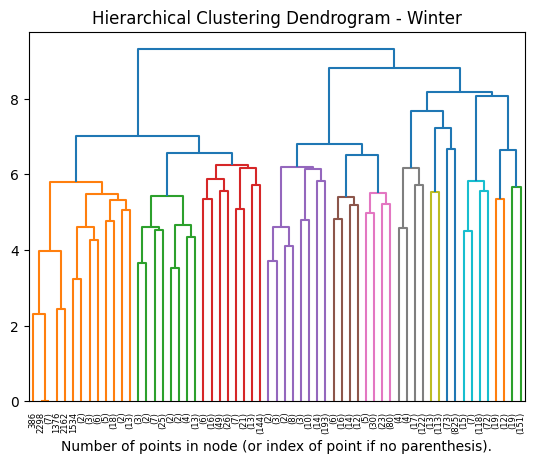

-------------------------------------------------- Spring --------------------------------------------------
Spring with 9 distance threshold (2 clusters):
Cluster 0:
Number of clients in the cluster: 1883
Items' counters:
[('rolls/buns', 298), ('other vegetables', 292), ('soda', 259), ('yogurt', 246), ('tropical fruit', 195), ('bottled water', 190), ('sausage', 172), ('root vegetables', 163), ('citrus fruit', 151), ('pastry', 145), ('shopping bags', 143), ('pip fruit', 140), ('whipped/sour cream', 129), ('canned beer', 128), ('brown bread', 109), ('bottled beer', 106), ('pork', 103), ('butter', 100), ('newspapers', 100), ('frankfurter', 99), ('domestic eggs', 94), ('margarine', 93), ('curd', 92), ('coffee', 91), ('beef', 90), ('fruit/vegetable juice', 85), ('chicken', 80), ('chocolate', 69), ('UHT-milk', 67), ('frozen vegetables', 67), ('dessert', 66), ('napkins', 63), ('frozen meals', 62), ('hamburger meat', 60), ('cream cheese ', 59), ('onions', 58), ('long life bakery product', 56)

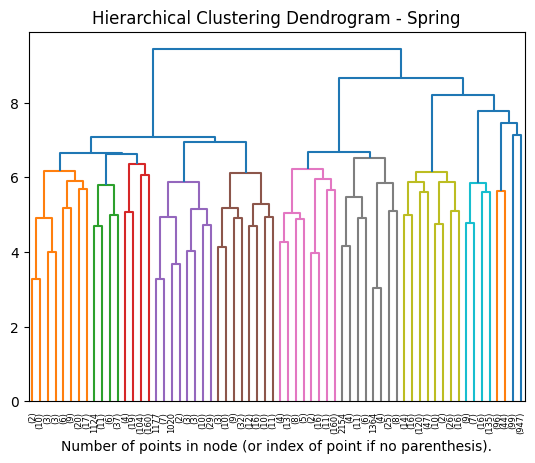

Spring with 8.5 distance threshold (3 clusters):
Cluster 0:
Number of clients in the cluster: 1604
Items' counters:
[('rolls/buns', 259), ('soda', 217), ('yogurt', 208), ('tropical fruit', 172), ('bottled water', 164), ('sausage', 146), ('root vegetables', 140), ('shopping bags', 127), ('citrus fruit', 125), ('pastry', 125), ('pip fruit', 119), ('canned beer', 117), ('whipped/sour cream', 106), ('brown bread', 95), ('bottled beer', 91), ('butter', 88), ('domestic eggs', 88), ('newspapers', 88), ('pork', 82), ('margarine', 81), ('coffee', 79), ('beef', 78), ('frankfurter', 78), ('fruit/vegetable juice', 75), ('curd', 73), ('chicken', 68), ('chocolate', 63), ('frozen vegetables', 58), ('napkins', 56), ('UHT-milk', 56), ('dessert', 56), ('cream cheese ', 53), ('frozen meals', 52), ('onions', 51), ('hamburger meat', 50), ('long life bakery product', 50), ('waffles', 47), ('salty snack', 44), ('misc. beverages', 43), ('berries', 42), ('white bread', 42), ('butter milk', 41), ('beverages', 4

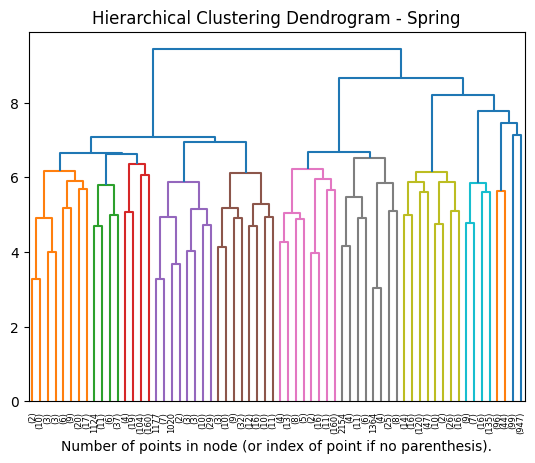

Spring with 8 distance threshold (4 clusters):
Cluster 0:
Number of clients in the cluster: 1353
Items' counters:
[('soda', 187), ('yogurt', 174), ('tropical fruit', 149), ('bottled water', 142), ('sausage', 130), ('pastry', 116), ('root vegetables', 115), ('citrus fruit', 108), ('shopping bags', 101), ('canned beer', 100), ('pip fruit', 98), ('whipped/sour cream', 91), ('brown bread', 78), ('bottled beer', 78), ('butter', 77), ('domestic eggs', 75), ('beef', 72), ('pork', 72), ('coffee', 71), ('newspapers', 71), ('fruit/vegetable juice', 65), ('margarine', 63), ('frankfurter', 63), ('curd', 59), ('chicken', 53), ('UHT-milk', 50), ('frozen vegetables', 50), ('napkins', 48), ('cream cheese ', 48), ('dessert', 47), ('hamburger meat', 44), ('long life bakery product', 43), ('chocolate', 43), ('frozen meals', 42), ('waffles', 41), ('onions', 41), ('misc. beverages', 37), ('oil', 36), ('butter milk', 36), ('berries', 36), ('beverages', 36), ('sugar', 34), ('meat', 33), ('white bread', 33), 

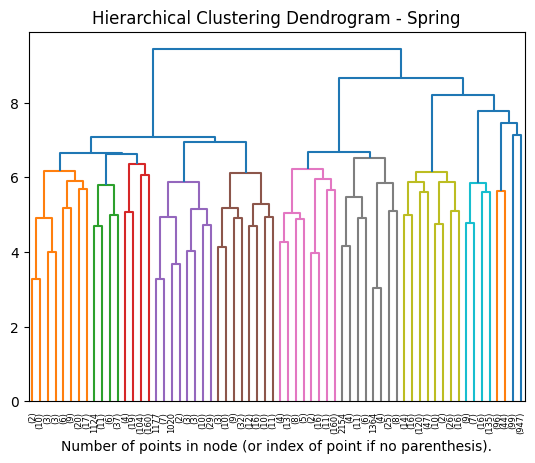

-------------------------------------------------- Summer --------------------------------------------------
Summer with 9 distance threshold (2 clusters):
Cluster 0:
Number of clients in the cluster: 1887
Items' counters:
[('other vegetables', 368), ('rolls/buns', 315), ('soda', 303), ('yogurt', 246), ('root vegetables', 212), ('tropical fruit', 190), ('sausage', 176), ('bottled water', 167), ('pastry', 163), ('citrus fruit', 151), ('canned beer', 146), ('bottled beer', 145), ('pip fruit', 131), ('shopping bags', 130), ('whipped/sour cream', 130), ('frankfurter', 113), ('domestic eggs', 111), ('newspapers', 110), ('butter', 107), ('pork', 104), ('beef', 102), ('brown bread', 100), ('chicken', 96), ('fruit/vegetable juice', 96), ('coffee', 96), ('curd', 95), ('margarine', 86), ('cream cheese ', 80), ('frozen vegetables', 78), ('UHT-milk', 77), ('chocolate', 72), ('white bread', 71), ('napkins', 67), ('onions', 64), ('butter milk', 63), ('hamburger meat', 59), ('berries', 58), ('sugar',

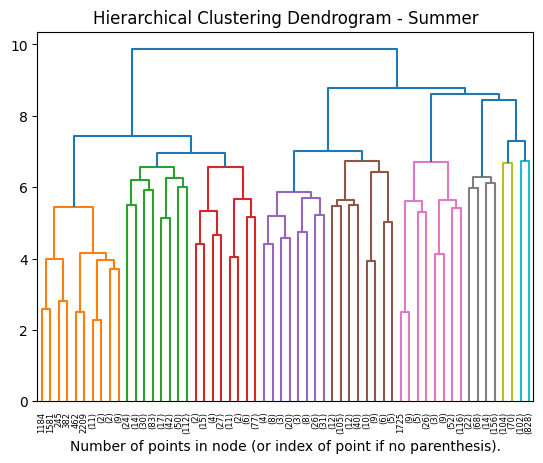

Summer with 8.5 distance threshold (4 clusters):
Cluster 0:
Number of clients in the cluster: 1364
Items' counters:
[('other vegetables', 264), ('yogurt', 173), ('root vegetables', 165), ('tropical fruit', 129), ('citrus fruit', 116), ('pastry', 115), ('bottled water', 114), ('sausage', 111), ('canned beer', 107), ('pip fruit', 100), ('whipped/sour cream', 96), ('bottled beer', 95), ('newspapers', 92), ('beef', 87), ('shopping bags', 84), ('domestic eggs', 79), ('frankfurter', 77), ('butter', 76), ('pork', 73), ('brown bread', 72), ('coffee', 70), ('curd', 68), ('chicken', 68), ('margarine', 63), ('fruit/vegetable juice', 61), ('cream cheese ', 56), ('chocolate', 55), ('white bread', 50), ('UHT-milk', 50), ('onions', 49), ('sugar', 49), ('frozen vegetables', 49), ('napkins', 48), ('butter milk', 47), ('berries', 41), ('hamburger meat', 40), ('waffles', 40), ('salty snack', 39), ('grapes', 39), ('frozen meals', 37), ('specialty chocolate', 36), ('dessert', 36), ('ham', 35), ('hard chees

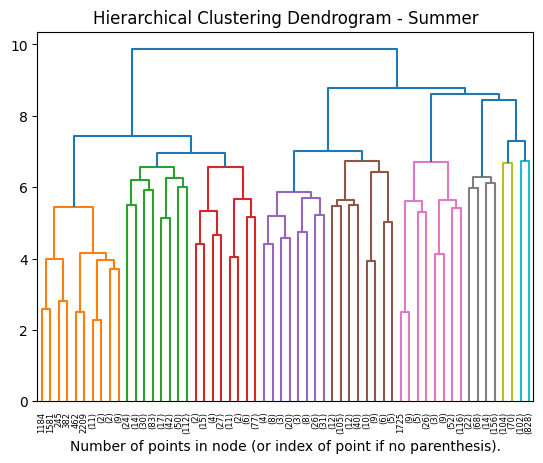

Summer with 8 distance threshold (5 clusters):
Cluster 0:
Number of clients in the cluster: 546
Items' counters:
[('whole milk', 546), ('other vegetables', 96), ('rolls/buns', 79), ('citrus fruit', 58), ('sausage', 58), ('yogurt', 57), ('soda', 53), ('domestic eggs', 51), ('pip fruit', 49), ('root vegetables', 48), ('pastry', 47), ('tropical fruit', 46), ('bottled water', 46), ('newspapers', 45), ('shopping bags', 43), ('bottled beer', 43), ('pork', 39), ('frankfurter', 34), ('coffee', 33), ('canned beer', 33), ('butter', 32), ('chicken', 32), ('whipped/sour cream', 32), ('fruit/vegetable juice', 31), ('white bread', 31), ('beef', 31), ('brown bread', 30), ('dessert', 29), ('curd', 29), ('frozen vegetables', 27), ('sugar', 26), ('margarine', 25), ('hamburger meat', 25), ('cream cheese ', 23), ('onions', 22), ('berries', 21), ('chocolate', 21), ('napkins', 20), ('salty snack', 19), ('hygiene articles', 19), ('ham', 18), ('beverages', 18), ('meat', 17), ('grapes', 16), ('ice cream', 15),

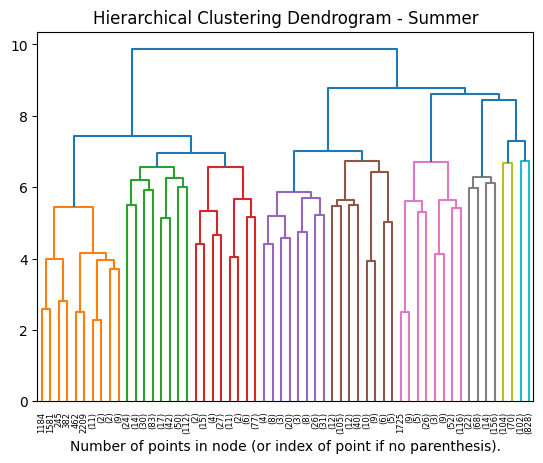

-------------------------------------------------- Fall --------------------------------------------------
Fall with 9 distance threshold (3 clusters):
Cluster 0:
Number of clients in the cluster: 1571
Items' counters:
[('rolls/buns', 285), ('soda', 244), ('yogurt', 220), ('root vegetables', 182), ('tropical fruit', 168), ('bottled water', 131), ('pastry', 128), ('citrus fruit', 124), ('canned beer', 119), ('sausage', 114), ('pip fruit', 107), ('shopping bags', 103), ('pork', 99), ('whipped/sour cream', 97), ('bottled beer', 90), ('margarine', 89), ('brown bread', 88), ('newspapers', 87), ('frankfurter', 85), ('fruit/vegetable juice', 84), ('domestic eggs', 82), ('beef', 76), ('coffee', 72), ('butter', 71), ('curd', 67), ('berries', 62), ('white bread', 61), ('dessert', 58), ('chicken', 58), ('chocolate', 54), ('napkins', 54), ('onions', 52), ('frozen vegetables', 50), ('sliced cheese', 48), ('salty snack', 48), ('butter milk', 47), ('long life bakery product', 44), ('cream cheese ', 4

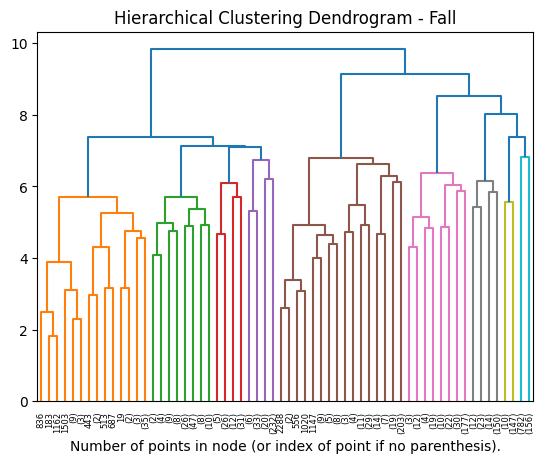

Fall with 8.5 distance threshold (4 clusters):
Cluster 0:
Number of clients in the cluster: 1294
Items' counters:
[('soda', 205), ('yogurt', 184), ('root vegetables', 153), ('tropical fruit', 145), ('pastry', 111), ('bottled water', 107), ('sausage', 101), ('citrus fruit', 99), ('canned beer', 97), ('whipped/sour cream', 87), ('pip fruit', 86), ('pork', 86), ('shopping bags', 82), ('newspapers', 76), ('bottled beer', 76), ('brown bread', 72), ('frankfurter', 71), ('domestic eggs', 70), ('margarine', 69), ('beef', 68), ('fruit/vegetable juice', 63), ('coffee', 62), ('butter', 56), ('curd', 54), ('berries', 52), ('white bread', 51), ('onions', 46), ('chocolate', 44), ('chicken', 44), ('dessert', 43), ('frozen vegetables', 43), ('napkins', 43), ('butter milk', 43), ('sliced cheese', 40), ('salty snack', 40), ('UHT-milk', 38), ('ice cream', 36), ('long life bakery product', 36), ('hamburger meat', 36), ('misc. beverages', 35), ('ham', 34), ('beverages', 33), ('cream cheese ', 31), ('specia

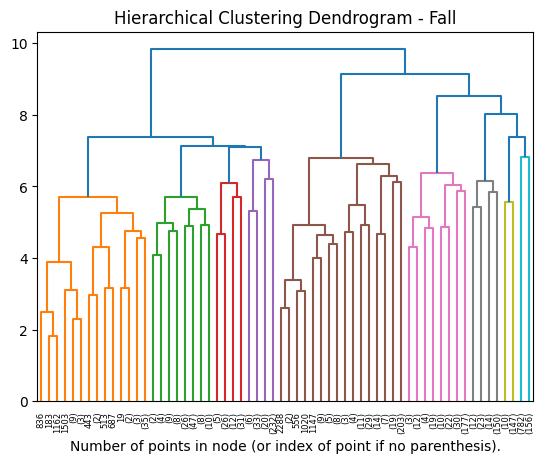

Fall with 8 distance threshold (5 clusters):
Cluster 0:
Number of clients in the cluster: 1095
Items' counters:
[('yogurt', 162), ('root vegetables', 130), ('tropical fruit', 125), ('bottled water', 97), ('pastry', 93), ('canned beer', 84), ('citrus fruit', 82), ('sausage', 77), ('whipped/sour cream', 72), ('pork', 72), ('newspapers', 69), ('pip fruit', 68), ('bottled beer', 68), ('shopping bags', 65), ('domestic eggs', 64), ('margarine', 64), ('brown bread', 63), ('beef', 61), ('frankfurter', 59), ('fruit/vegetable juice', 56), ('coffee', 54), ('white bread', 50), ('curd', 49), ('berries', 46), ('butter', 45), ('onions', 41), ('chicken', 40), ('frozen vegetables', 39), ('salty snack', 38), ('dessert', 37), ('napkins', 36), ('chocolate', 35), ('butter milk', 35), ('UHT-milk', 34), ('ice cream', 33), ('misc. beverages', 31), ('long life bakery product', 30), ('sliced cheese', 30), ('hamburger meat', 29), ('ham', 27), ('specialty chocolate', 27), ('oil', 27), ('beverages', 27), ('frozen 

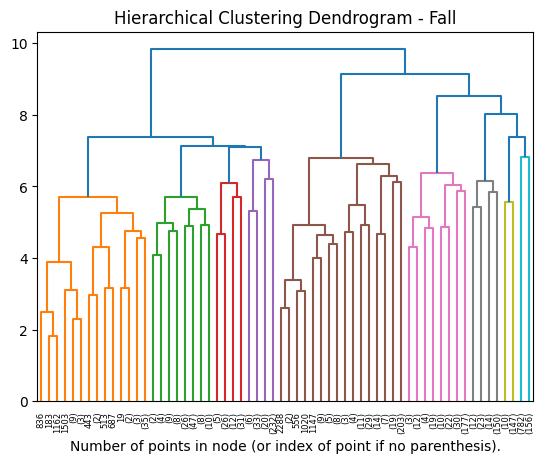

In [ ]:
def count_items_in_cluster(clusters):
  """Count the items in each cluster."""
  for index, cluster in enumerate(clusters):
    items_counters = {}
    cluster_items = cluster

    print(f'Cluster {index}:')

    for items in cluster:
      for item in items:
        if item in items_counters:
          items_counters[item] += 1
        else:
          items_counters[item] = 1

    sorted_items_counters = sorted(items_counters.items(), key=lambda x: x[1], reverse=True)

    print("Number of clients in the cluster:", len(cluster))
    print("Items' counters:")
    print(sorted_items_counters)
    print()

def cluster_based_on_similarity_matrix(similarity_matrix, items_per_clients, distance_threshold):
  """Do clustering based on a similarity matrix."""
  # Apply the agglomerative clustering
  model = AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=distance_threshold).fit(similarity_matrix)

  cluster_labels = model.labels_
  number_of_clusters = max(model.labels_)
  clusters = [[] for _ in range(number_of_clusters + 1)]
  items_per_client_list = list(items_per_clients.values())

  # Put all the clients' items that belong to the same cluster into the same list
  for index, cluster_label in enumerate(cluster_labels):
    clusters[cluster_label].append(items_per_client_list[index])

  return model, clusters

def plot_dendrogram(model, **kwargs):
  """Plot the dendrogram for a clustering model."""
  # Create linkage matrix and then plot the dendrogram
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)

  for index, merge in enumerate(model.children_):
    current_count = 0

    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1
      else:
        current_count += counts[child_idx - n_samples]

    counts[index] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

distance_thresholds = [9, 8.5, 8]

clustering_settings = {
    'Winter': {
        'similarity_matrix': winter_similarity_matrix,
        'items_per_clients': winter_items_per_clients,
        'distance_thresholds': distance_thresholds,
    },
    'Spring': {
        'similarity_matrix': spring_similarity_matrix,
        'items_per_clients': spring_items_per_clients,
        'distance_thresholds': distance_thresholds,
    },
    'Summer': {
        'similarity_matrix': summer_similarity_matrix,
        'items_per_clients': summer_items_per_clients,
        'distance_thresholds': distance_thresholds,
    },
    'Fall': {
        'similarity_matrix': fall_similarity_matrix,
        'items_per_clients': fall_items_per_clients,
        'distance_thresholds': distance_thresholds,
    },
}

# Do the clustering for each season and each distance threshold
for season_name in clustering_settings:
  print('-' * 50, season_name, '-' * 50)

  similarity_matrix = clustering_settings[season_name]['similarity_matrix']
  items_per_clients = clustering_settings[season_name]['items_per_clients']

  for distance_threshold in clustering_settings[season_name]['distance_thresholds']:
    model, clusters = cluster_based_on_similarity_matrix(similarity_matrix, items_per_clients, distance_threshold)
    title = f"{season_name} with {distance_threshold} distance threshold ({len(clusters)} clusters)"

    print(f"{title}:")

    count_items_in_cluster(clusters)

    plt.title(f"Hierarchical Clustering Dendrogram - {season_name}")

    plot_dendrogram(model, truncate_mode="level", p=5)

    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()